# Start

## libraries

In [ ]:
!pip install statsforecast mlforecast neuralforecast datasetsforecast

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.5/221.5 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.5/223.5 kB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.6/40.6 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 812.2/812.2 kB 51.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.0/66.0 MB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 64.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 12.7 MB/s eta 0:00:00
  Using cached n

## drive mount

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
import os
os.chdir('/content/drive/My Drive/Thesis2')

Mounted at /content/drive


# Import and data split

## Data import

In [ ]:
Y_df = pd.read_csv('Data/all-users-daily-data.csv')

# Convert 'date' column to datetime if it's not already formatted
Y_df['date'] = pd.to_datetime(Y_df['date'])

# Sort the DataFrame by userId and date
Y_df = Y_df.sort_values(by=['userId', 'date'])

# Calculate energy_lag
Y_df['energy_lag'] = Y_df.groupby('userId')['energy'].diff()

# Calculate kWh per day
Y_df['kwh_perday'] = Y_df['energy_lag'] / (10**10)

# Rename columns
Y_df = Y_df.rename(columns={'userId': 'unique_id', 'date': 'ds', 'kwh_perday': 'y', 'energy':'energy_cumulative'})

# Reorder columns


Y_df = Y_df.sort_values(by=['unique_id', 'ds'])




# Assuming your DataFrame is named df
unique_id_count = Y_df['unique_id'].nunique()

print("Number of unique unique_id values:", unique_id_count)

Y_df

Number of unique unique_id values: 969


,unique_id,ds,energy_cumulative,energy_lag,y
356608,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2018-10-12,31646108000,NaN,NaN
356609,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2018-10-13,38159380000,6.513272e+09,0.651327
356610,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2018-10-14,80650695000,4.249132e+10,4.249131
356611,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2018-10-15,87495784000,6.845089e+09,0.684509
356612,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2018-10-16,102441659000,1.494588e+10,1.494587
...,...,...,...,...,...
166210,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0...,2020-10-27,219778670464457,2.870954e+11,28.709540
166211,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0...,2020-10-28,219998857638808,2.201872e+11,22.018717
166212,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0...,2020-10-29,220240994550913,2.421369e+11,24.213691
166213,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0...,2020-10-30,220436561682227,1.955671e+11,19.556713


In [ ]:
first_timestamp = Y_df['ds'].min()
last_timestamp = Y_df['ds'].max()
first_timestamp, last_timestamp

(Timestamp('2017-11-01 00:00:00'), Timestamp('2020-10-31 00:00:00'))

In [ ]:
Y_df = Y_df[['unique_id', 'ds', 'y']]

Y_df.dropna(inplace=True)

first_timestamp = Y_df['ds'].min()
last_timestamp = Y_df['ds'].max()
first_timestamp, last_timestamp

<ipython-input-5-6ce74d5c2822>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_df.dropna(inplace=True)


(Timestamp('2017-11-02 00:00:00'), Timestamp('2020-10-31 00:00:00'))

Mean ADF Statistic: -4.547582721582877
Median ADF Statistic: -3.988992882264344
Number of stationary time series: 760
Number of non-stationary time series: 209
Mean Autocorrelation: [1.         0.43667604 0.33408448 0.29082123 0.27086634 0.26124712
 0.28548781]
Mean Partial Autocorrelation: [1.         0.43724292 0.14597869 0.10605261 0.07973686 0.07339338
 0.09783186]
Significant Autocorrelation: [ True  True  True  True  True  True  True]
Significant Partial Autocorrelation: [ True  True  True  True  True  True  True]


<ipython-input-51-a05269395757>:70: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(mean_autocorr, use_line_collection=True)
<ipython-input-51-a05269395757>:77: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(mean_partial_autocorr, use_line_collection=True)


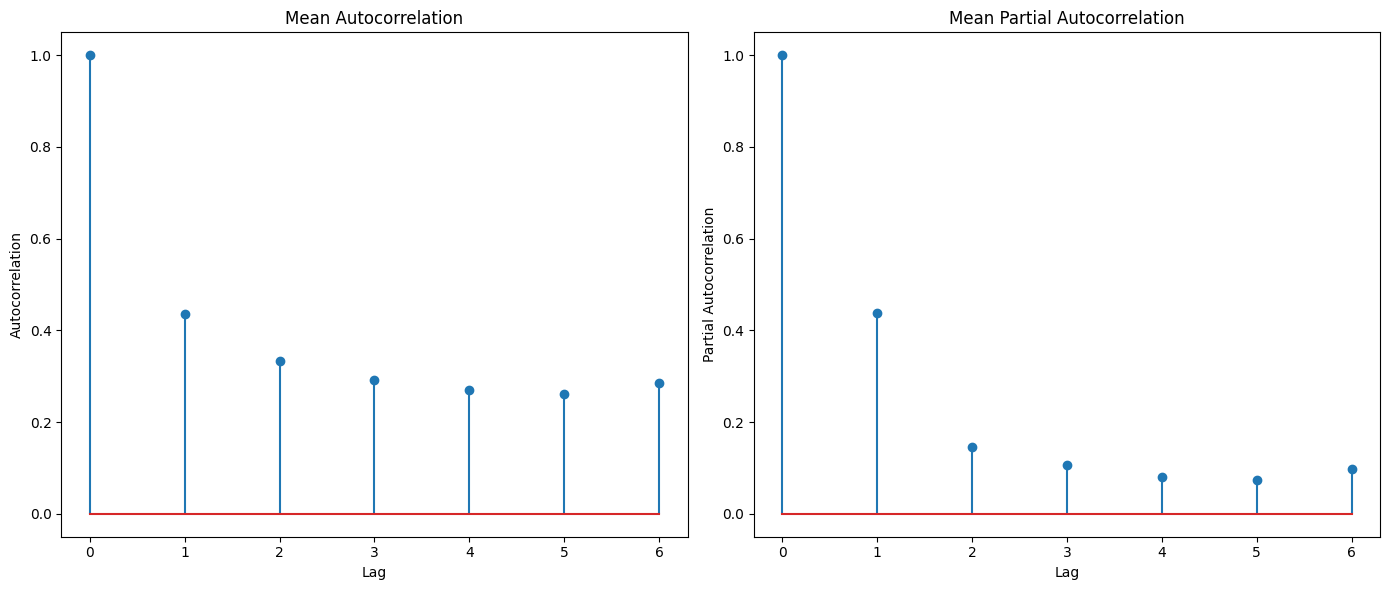

In [ ]:
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Assuming your DataFrame is named df
adf_results = []

# Loop through each unique_id
for unique_id, group_data in Y_df.groupby('unique_id'):
    # Apply ADF test to the 'y' column of the group_data
    result = adfuller(group_data['y'])
    adf_results.append((unique_id, result[0], result[1]))

# Convert results to DataFrame
adf_results_df = pd.DataFrame(adf_results, columns=['unique_id', 'ADF Statistic', 'p-value'])

# Calculate mean or median of ADF statistic
adf_statistic_mean = adf_results_df['ADF Statistic'].mean()
adf_statistic_median = adf_results_df['ADF Statistic'].median()

# Set threshold
threshold = 0.05  # You can adjust this threshold based on your significance level

# Determine stationary or non-stationary based on threshold
stationary_ids = adf_results_df[adf_results_df['p-value'] < threshold]['unique_id'].tolist()
non_stationary_ids = adf_results_df[adf_results_df['p-value'] >= threshold]['unique_id'].tolist()

# Summary
print(f"Mean ADF Statistic: {adf_statistic_mean}")
print(f"Median ADF Statistic: {adf_statistic_median}")
print(f"Number of stationary time series: {len(stationary_ids)}")
print(f"Number of non-stationary time series: {len(non_stationary_ids)}")

# Assuming df is your DataFrame with columns unique_id, ds, and y

# Step 1: Group by unique_id
groups = Y_df.groupby('unique_id')

# Step 2: Compute autocorrelation and partial autocorrelation for each group
autocorr_results = []
partial_autocorr_results = []

nlags = 6
for name, group in groups:
    autocorr = sm.tsa.acf(group['y'], nlags=nlags)  # Adjust nlags as needed
    partial_autocorr = sm.tsa.pacf(group['y'], nlags=nlags)  # Adjust nlags as needed
    autocorr_results.append(autocorr)
    partial_autocorr_results.append(partial_autocorr)

# Step 3: Aggregate results using mean or median
mean_autocorr = np.mean(autocorr_results, axis=0)
mean_partial_autocorr = np.mean(partial_autocorr_results, axis=0)

# Step 4: Apply thresholding to determine significance
threshold = 0.05  # Define your threshold here
significant_autocorr = np.abs(mean_autocorr) > threshold
significant_partial_autocorr = np.abs(mean_partial_autocorr) > threshold

# Print or use the results as needed
print("Mean Autocorrelation:", mean_autocorr)
print("Mean Partial Autocorrelation:", mean_partial_autocorr)
print("Significant Autocorrelation:", significant_autocorr)
print("Significant Partial Autocorrelation:", significant_partial_autocorr)

# Plotting
plt.figure(figsize=(14, 6))

# Mean Autocorrelation plot
plt.subplot(1, 2, 1)
plt.stem(mean_autocorr, use_line_collection=True)
plt.title('Mean Autocorrelation')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')

# Mean Partial Autocorrelation plot
plt.subplot(1, 2, 2)
plt.stem(mean_partial_autocorr, use_line_collection=True)
plt.title('Mean Partial Autocorrelation')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')

# Show plot
plt.tight_layout()
plt.show()

Missing data percentage:
unique_id     0.000000
ds            0.000000
y            21.912436
dtype: float64


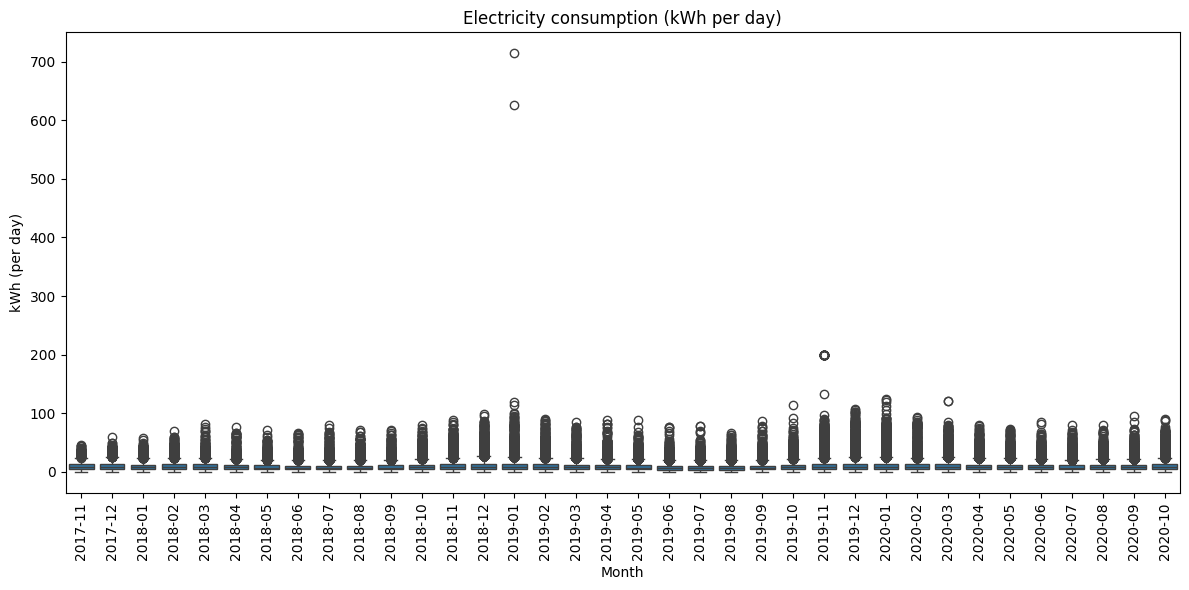

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from utilsforecast.preprocessing import fill_gaps

Y_df_train_1EDA = fill_gaps(
    Y_df,
    freq='D',
    start='global',
    end='global'
)

# Calculate missing data percentage for each variable
missing_percentage = Y_df_train_1EDA.isnull().mean() * 100

print("Missing data percentage:")
print(missing_percentage)

# Generate a time series box plot aggregated by month
Y_df_train_1EDA['month'] = Y_df_train_1EDA['ds'].dt.to_period('M')
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='y', data=Y_df_train_1EDA)
plt.xticks(rotation=90)
plt.title('Electricity consumption (kWh per day)')
plt.xlabel('Month')
plt.ylabel('kWh (per day)')
plt.tight_layout()
plt.show()

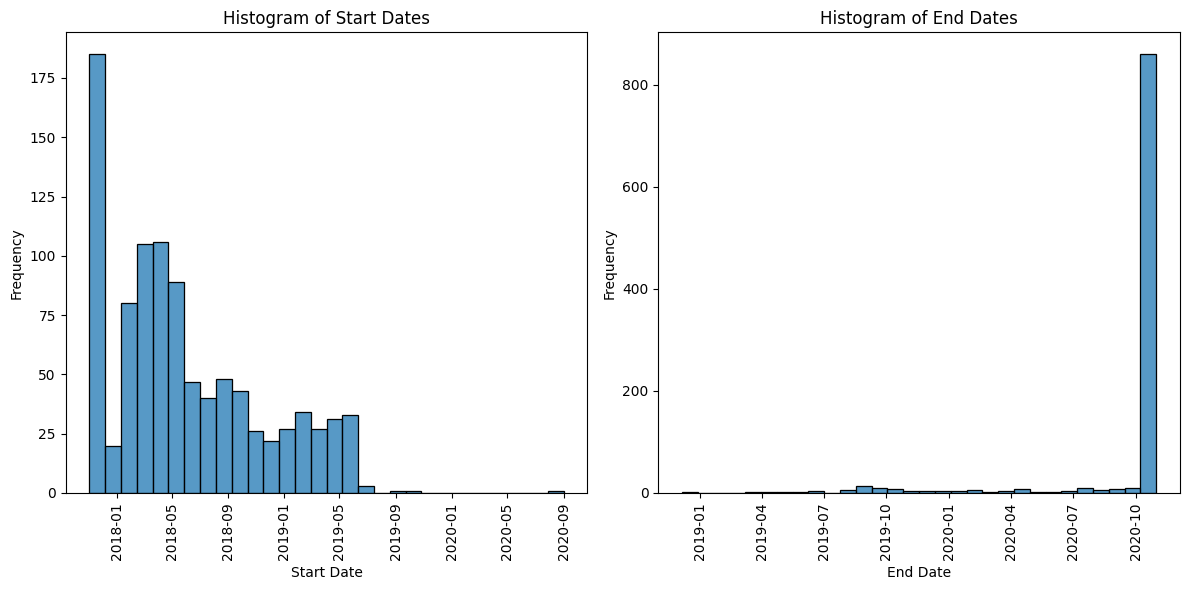

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the starting and ending dates for each unique_id
start_dates = Y_df.groupby('unique_id')['ds'].min()
end_dates = Y_df.groupby('unique_id')['ds'].max()

# Create dataframes for starting and ending dates
start_dates_df = start_dates.reset_index().rename(columns={'ds': 'start_date'})
end_dates_df = end_dates.reset_index().rename(columns={'ds': 'end_date'})

# Plot histograms for the start and end dates
plt.figure(figsize=(12, 6))

# Histogram for start dates
plt.subplot(1, 2, 1)
sns.histplot(start_dates_df['start_date'], bins=30, kde=False)
plt.title('Histogram of Start Dates')
plt.xlabel('Start Date')
plt.ylabel('Frequency')
plt.xticks(rotation=90)


# Histogram for end dates
plt.subplot(1, 2, 2)
sns.histplot(end_dates_df['end_date'], bins=30, kde=False)
plt.title('Histogram of End Dates')
plt.xlabel('End Date')
plt.ylabel('Frequency')
plt.xticks(rotation=90)


plt.tight_layout()
plt.show()

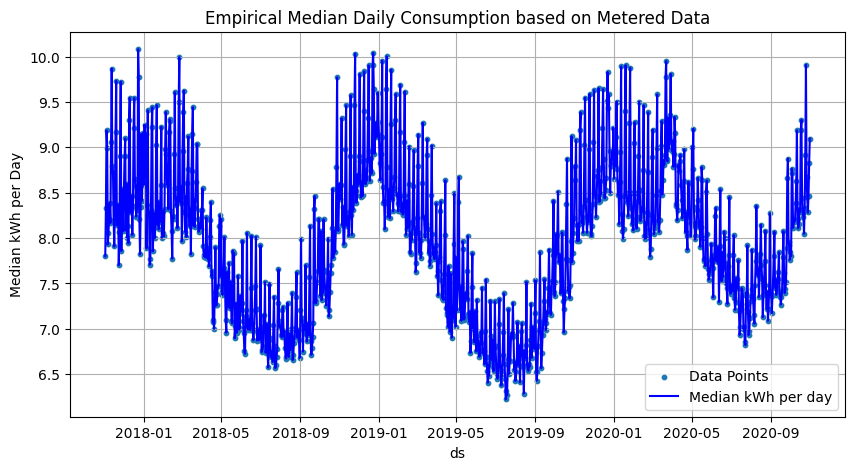

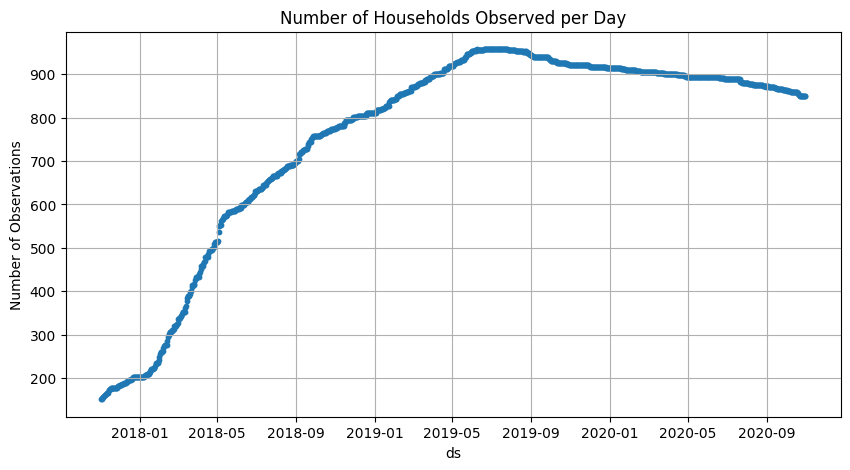

In [ ]:
import matplotlib.pyplot as plt

Y_df_dropped = Y_df.dropna()

# Calculate the necessary statistics for each day
stats_per_day_Yearly = Y_df_dropped.groupby('ds').agg(
    mean_kwh_perday=('y', 'mean'),
    median_kwh_perday=('y', 'median'),
    sd=('y', 'std'),
    n=('y', lambda x: x.notna().sum()),
    q05=('y', lambda x: np.percentile(x.dropna(), 5)),
    q95=('y', lambda x: np.percentile(x.dropna(), 95))
).reset_index()

# Plotting Median kWh per Day
plt.figure(figsize=(10, 5))
plt.scatter(stats_per_day_Yearly['ds'], stats_per_day_Yearly['median_kwh_perday'], s=10, label='Data Points')
plt.plot(stats_per_day_Yearly['ds'], stats_per_day_Yearly['median_kwh_perday'], label='Median kWh per day', color='blue')
plt.title('Empirical Median Daily Consumption based on Metered Data')
plt.xlabel('ds')
plt.ylabel('Median kWh per Day')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the number of observations per day
plt.figure(figsize=(10, 5))
plt.scatter(stats_per_day_Yearly['ds'], stats_per_day_Yearly['n'], s=10)
plt.title('Number of Households Observed per Day')
plt.xlabel('ds')
plt.ylabel('Number of Observations')
plt.grid(True)
plt.show()

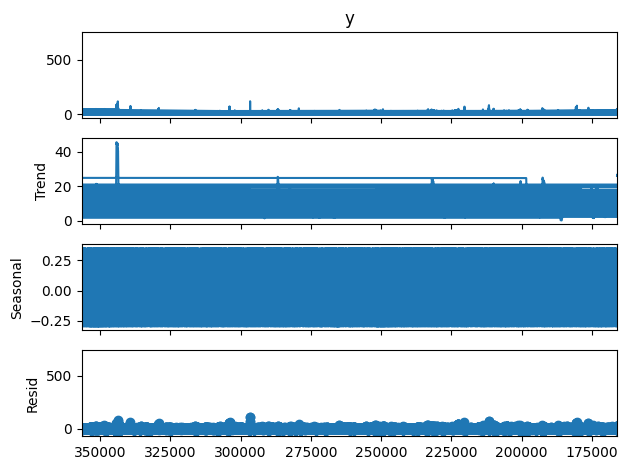

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt


# Decomposing the series to find seasonality
Y_df_dropped = Y_df.dropna()

period = 365
decomposition = seasonal_decompose(Y_df_dropped['y'], model='additive', period=period)  # Adjust period based on your guess

# Plot the decomposed components
fig = decomposition.plot()
plt.show()

## Outlier filter

In [ ]:
import pandas as pd

# Assuming your DataFrame is named df
# Calculate standard deviation for all y values
global_std = Y_df['y'].std()

# Determine the threshold multiplier for exceptionally high consumption
threshold_multiplier = 20

# Calculate the threshold for exceptionally high consumption
threshold = global_std * threshold_multiplier

# Identify unique_ids where any y value exceeds the threshold
high_consumption_ids = Y_df.groupby('unique_id')['y'].max() > threshold

# Filter out rows corresponding to these unique_ids
Y_df = Y_df[~Y_df['unique_id'].isin(high_consumption_ids[high_consumption_ids].index)]

# Now, filtered_df contains your DataFrame with entire unique_ids removed if any of their y values exceed the threshold


# Assuming your DataFrame is named df
unique_id_count = Y_df['unique_id'].nunique()

print("Number of unique unique_id values:", unique_id_count)
threshold

Number of unique unique_id values: 967


134.73649955349526

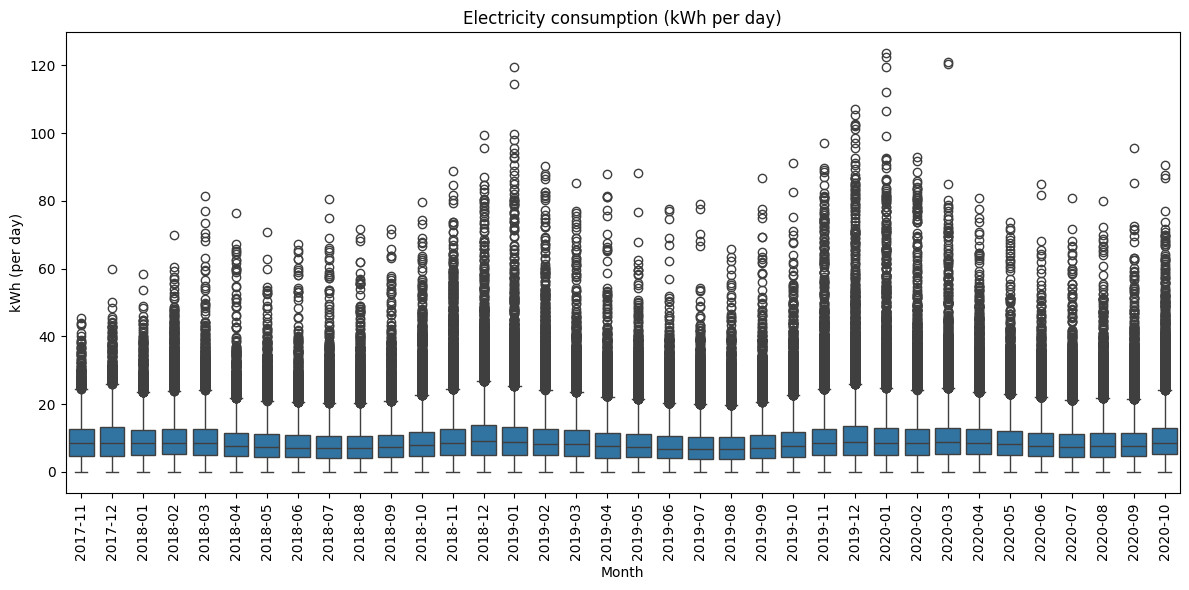

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from utilsforecast.preprocessing import fill_gaps

Y_df_train_1EDA = fill_gaps(
    Y_df,
    freq='D',
    start='global',
    end='global'
)

# Generate a time series box plot aggregated by month
Y_df_train_1EDA['month'] = Y_df_train_1EDA['ds'].dt.to_period('M')
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='y', data=Y_df_train_1EDA)
plt.xticks(rotation=90)
plt.title('Electricity consumption (kWh per day)')
plt.xlabel('Month')
plt.ylabel('kWh (per day)')
plt.tight_layout()
plt.show()

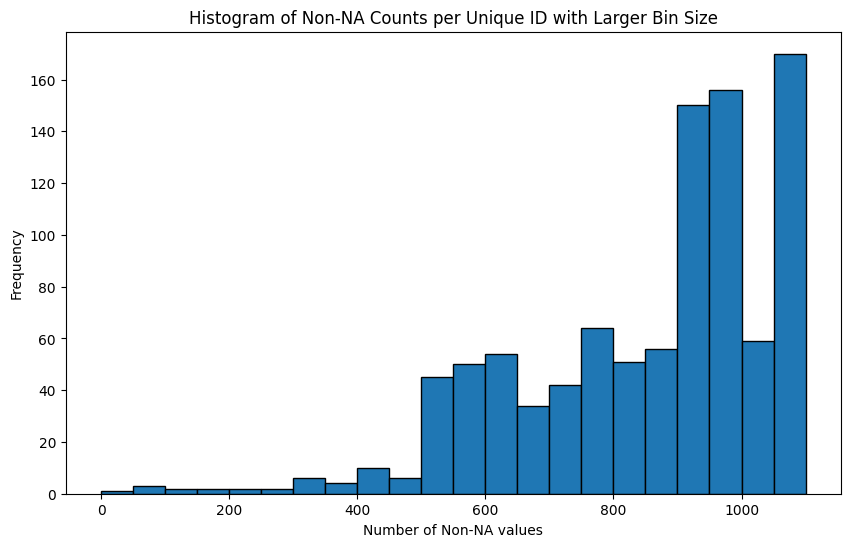

In [ ]:
# Group by unique_id and count non-NA values in the 'y' column
non_na_counts = Y_df_train_1EDA.groupby('unique_id')['y'].apply(lambda x: x.notna().sum())

# Plot the histogram of non-NA counts with larger bin size
plt.figure(figsize=(10, 6))
bin_width = 50  # Adjust this value as needed
bins = range(0, non_na_counts.max() + bin_width, bin_width)
plt.hist(non_na_counts, bins=bins, edgecolor='black')
plt.xlabel('Number of Non-NA values')
plt.ylabel('Frequency')
plt.title('Histogram of Non-NA Counts per Unique ID with Larger Bin Size')
plt.show()

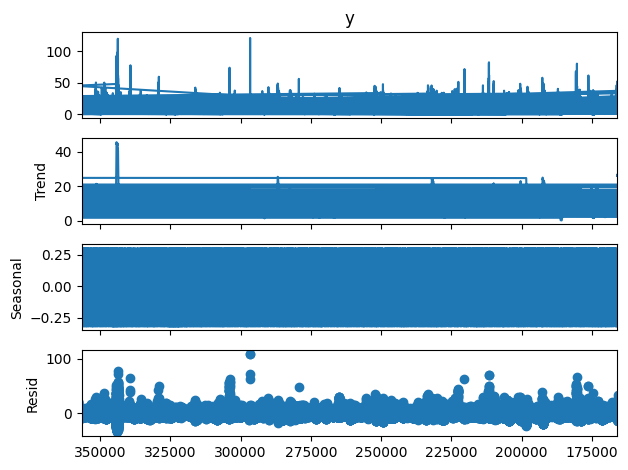

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposing the series to find seasonality
Y_df_dropped = Y_df.dropna()

period = 365
decomposition = seasonal_decompose(Y_df_dropped['y'], model='additive', period=period)  # Adjust period based on your guess

# Plot the decomposed components
fig = decomposition.plot()
plt.show()

## Same date end

In [ ]:
# Then, group by 'unique_id' and find the maximum 'ds'
max_dates = Y_df.groupby('unique_id')['ds'].max()

# Filter out the unique IDs where the last date is '2020-10-31'
unique_ids_last_1031 = max_dates[max_dates == pd.Timestamp('2020-10-31')].index

# Finally, filter the original DataFrame using these unique IDs
Y_df = Y_df[Y_df['unique_id'].isin(unique_ids_last_1031)]

# Starts after 2020-03-22 98ff6ab98a2821ac84b4c4b8fd5e7e6445837d8ee25fd195931a2d4ae1098711
Y_df.drop(Y_df[Y_df['unique_id'] == '98ff6ab98a2821ac84b4c4b8fd5e7e6445837d8ee25fd195931a2d4ae1098711'].index, inplace=True)

Y_df = Y_df[Y_df['unique_id'].isin(unique_ids_last_1031)]



unique_id_count = Y_df['unique_id'].nunique()

print("Number of unique unique_id values:", unique_id_count)

Y_df

Number of unique unique_id values: 847


,unique_id,ds,y
356609,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2018-10-13,0.651327
356610,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2018-10-14,4.249131
356611,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2018-10-15,0.684509
356612,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2018-10-16,1.494587
356613,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2018-10-17,1.516256
...,...,...,...
166210,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0...,2020-10-27,28.709540
166211,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0...,2020-10-28,22.018717
166212,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0...,2020-10-29,24.213691
166213,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0...,2020-10-30,19.556713


Mean ADF Statistic: -4.534121862569462
Median ADF Statistic: -3.988992882264344
Number of stationary time series: 672
Number of non-stationary time series: 175
Mean Autocorrelation: [1.         0.43735432 0.33620961 0.29263439 0.27233234 0.26328882
 0.28871377 0.33494672 0.26753996 0.22033771 0.20586238 0.20024133
 0.20183465 0.23211558 0.28192353 0.2204615  0.18087397 0.1686354
 0.16400814 0.16822453 0.20047867 0.24812728 0.19290966 0.15658421
 0.14804213 0.14359693 0.15018655 0.18125107 0.23098536 0.17588878
 0.13977315]
Mean Partial Autocorrelation: [ 1.00000000e+00  4.37867213e-01  1.50204916e-01  1.06965448e-01
  8.07080964e-02  7.52919309e-02  1.00740299e-01  1.38304875e-01
  1.77169280e-02  5.12846051e-03  1.52567982e-02  1.87610946e-02
  2.09282593e-02  4.93624677e-02  8.51749084e-02 -1.03753805e-03
 -7.59387788e-03  3.80675423e-03  4.27393740e-03  1.09735650e-02
  3.24424010e-02  6.49110371e-02 -6.19715692e-03 -7.38224412e-03
  8.28835006e-04  2.59802191e-03  5.96594309e-03  2

<ipython-input-40-98fcf391f89d>:70: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(mean_autocorr, use_line_collection=True)
<ipython-input-40-98fcf391f89d>:77: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(mean_partial_autocorr, use_line_collection=True)


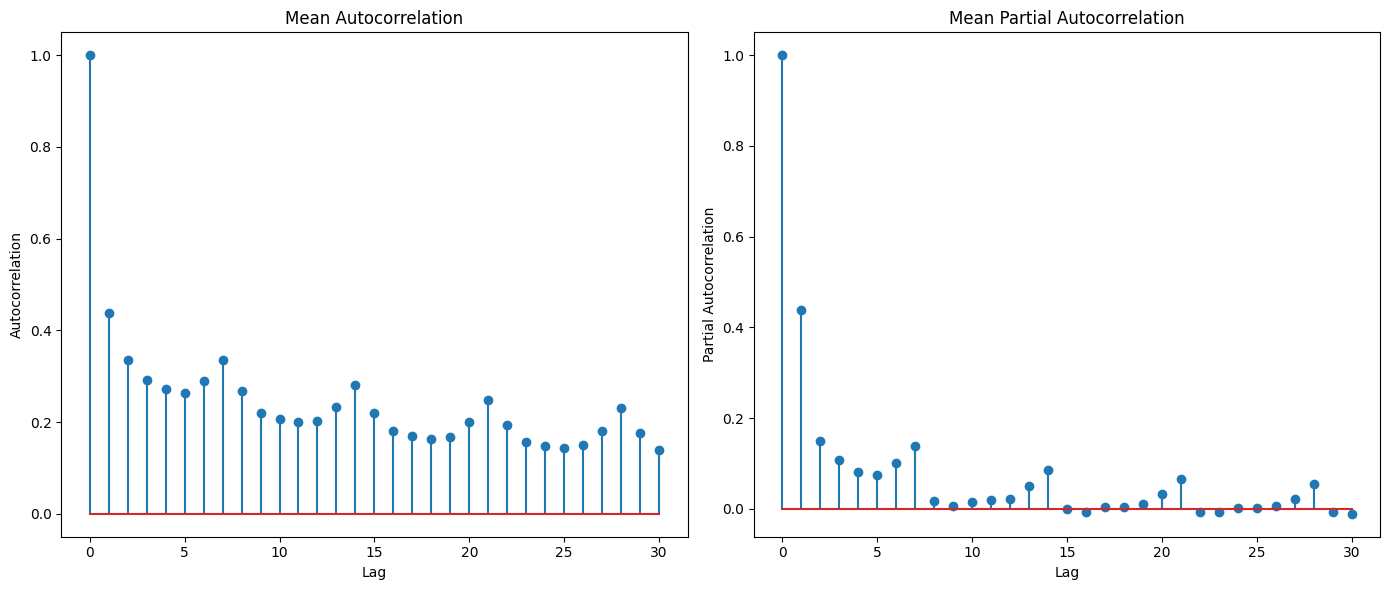

In [ ]:
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Assuming your DataFrame is named df
adf_results = []

# Loop through each unique_id
for unique_id, group_data in Y_df.groupby('unique_id'):
    # Apply ADF test to the 'y' column of the group_data
    result = adfuller(group_data['y'])
    adf_results.append((unique_id, result[0], result[1]))

# Convert results to DataFrame
adf_results_df = pd.DataFrame(adf_results, columns=['unique_id', 'ADF Statistic', 'p-value'])

# Calculate mean or median of ADF statistic
adf_statistic_mean = adf_results_df['ADF Statistic'].mean()
adf_statistic_median = adf_results_df['ADF Statistic'].median()

# Set threshold
threshold = 0.05  # You can adjust this threshold based on your significance level

# Determine stationary or non-stationary based on threshold
stationary_ids = adf_results_df[adf_results_df['p-value'] < threshold]['unique_id'].tolist()
non_stationary_ids = adf_results_df[adf_results_df['p-value'] >= threshold]['unique_id'].tolist()

# Summary
print(f"Mean ADF Statistic: {adf_statistic_mean}")
print(f"Median ADF Statistic: {adf_statistic_median}")
print(f"Number of stationary time series: {len(stationary_ids)}")
print(f"Number of non-stationary time series: {len(non_stationary_ids)}")

# Assuming df is your DataFrame with columns unique_id, ds, and y

# Step 1: Group by unique_id
groups = Y_df.groupby('unique_id')

# Step 2: Compute autocorrelation and partial autocorrelation for each group
autocorr_results = []
partial_autocorr_results = []

nlags = 30
for name, group in groups:
    autocorr = sm.tsa.acf(group['y'], nlags=nlags)  # Adjust nlags as needed
    partial_autocorr = sm.tsa.pacf(group['y'], nlags=nlags)  # Adjust nlags as needed
    autocorr_results.append(autocorr)
    partial_autocorr_results.append(partial_autocorr)

# Step 3: Aggregate results using mean or median
mean_autocorr = np.mean(autocorr_results, axis=0)
mean_partial_autocorr = np.mean(partial_autocorr_results, axis=0)

# Step 4: Apply thresholding to determine significance
threshold = 0.05  # Define your threshold here
significant_autocorr = np.abs(mean_autocorr) > threshold
significant_partial_autocorr = np.abs(mean_partial_autocorr) > threshold

# Print or use the results as needed
print("Mean Autocorrelation:", mean_autocorr)
print("Mean Partial Autocorrelation:", mean_partial_autocorr)
print("Significant Autocorrelation:", significant_autocorr)
print("Significant Partial Autocorrelation:", significant_partial_autocorr)

# Plotting
plt.figure(figsize=(14, 6))

# Mean Autocorrelation plot
plt.subplot(1, 2, 1)
plt.stem(mean_autocorr, use_line_collection=True)
plt.title('Mean Autocorrelation')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')

# Mean Partial Autocorrelation plot
plt.subplot(1, 2, 2)
plt.stem(mean_partial_autocorr, use_line_collection=True)
plt.title('Mean Partial Autocorrelation')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')

# Show plot
plt.tight_layout()
plt.show()

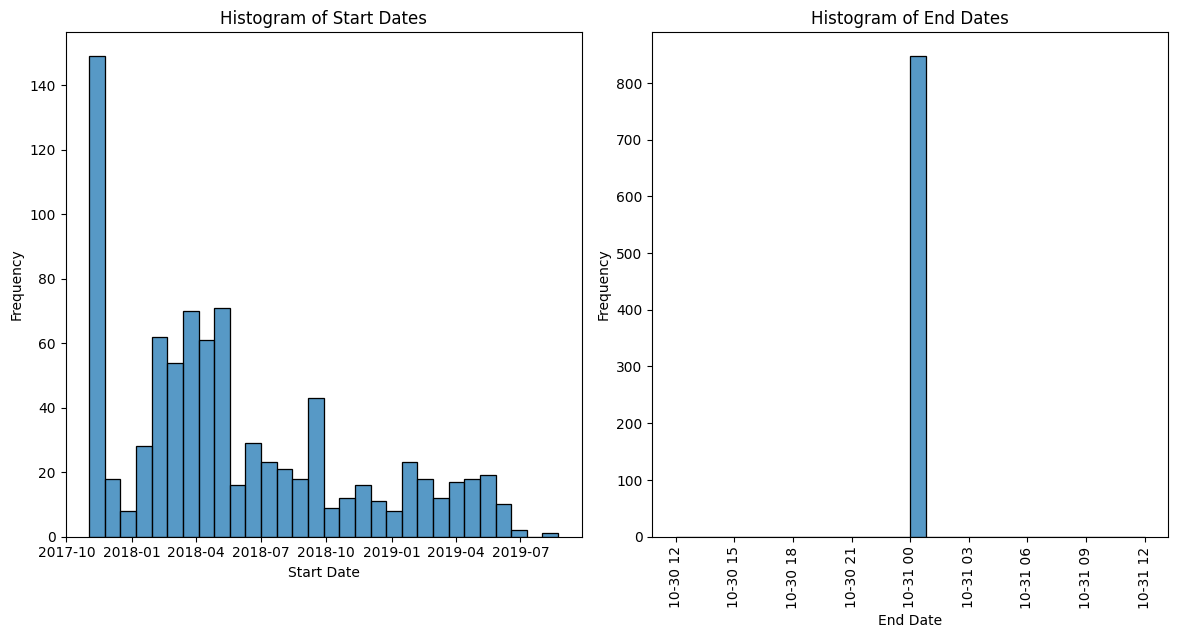

In [ ]:
# Calculate the starting and ending dates for each unique_id
start_dates = Y_df.groupby('unique_id')['ds'].min()
end_dates = Y_df.groupby('unique_id')['ds'].max()

# Create dataframes for starting and ending dates
start_dates_df = start_dates.reset_index().rename(columns={'ds': 'start_date'})
end_dates_df = end_dates.reset_index().rename(columns={'ds': 'end_date'})

# Plot histograms for the start and end dates
plt.figure(figsize=(12, 6))

# Histogram for start dates
plt.subplot(1, 2, 1)
sns.histplot(start_dates_df['start_date'], bins=30, kde=False)
plt.title('Histogram of Start Dates')
plt.xlabel('Start Date')
plt.ylabel('Frequency')

# Histogram for end dates
plt.subplot(1, 2, 2)
sns.histplot(end_dates_df['end_date'], bins=30, kde=False)
plt.title('Histogram of End Dates')
plt.xlabel('End Date')
plt.ylabel('Frequency')

plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

## split Training and Testing

In [ ]:
# group by 'unique_id' and find the maximum 'ds'

max_dates = Y_df.groupby('unique_id')['ds'].max()

# Define the split date
split_date = pd.to_datetime('2020-03-22')

#data.to_csv('filename.csv', index=False)
Y_df.to_csv('Processed data/Y_df.csv', index=False)

# Split the DataFrame into training
Y_df_train = Y_df[Y_df['ds'] < split_date]

#data.to_csv('filename.csv', index=False)
Y_df_train.to_csv('Processed data/Y_df_train.csv', index=False)

# Split the DataFrame into Test
Y_df_test = Y_df[Y_df['ds'] >= split_date]

Y_df_test.to_csv('Processed data/Y_df_test.csv', index=False)

unique_id_count_train = Y_df_train['unique_id'].nunique()
unique_id_count_test = Y_df_test['unique_id'].nunique()


print("Number of unique training unique_id values:", unique_id_count_train)
print("Number of unique testing unique_id values:", unique_id_count_test)


Number of unique training unique_id values: 847
Number of unique testing unique_id values: 847


In [ ]:
import pandas as pd

# Assuming your DataFrame is named df
# Group by unique_id and calculate the length of each time series
lengths = Y_df_train.groupby('unique_id')['ds'].count()

# Create a histogram table
histogram_table = pd.DataFrame({'unique_id': lengths.index, 'length': lengths.values})

# Group by length and count the frequency
frequency_table = histogram_table.groupby('length').size().reset_index(name='frequency')

# Sort by length if necessary
frequency_table = frequency_table.sort_values(by='length')

print(frequency_table)

     length  frequency
0       212          1
1       276          2
2       282          1
3       287          1
4       288          2
..      ...        ...
252     866          3
253     868          1
254     869          2
255     870          1
256     871        125

[257 rows x 2 columns]


In [ ]:
Y_df_test

,unique_id,ds,y
357135,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2020-03-22,2.231068
357136,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2020-03-23,1.459568
357137,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2020-03-24,1.001031
357138,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2020-03-25,0.347170
357139,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2020-03-26,0.487360
...,...,...,...
166210,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0...,2020-10-27,28.709540
166211,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0...,2020-10-28,22.018717
166212,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0...,2020-10-29,24.213691
166213,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0...,2020-10-30,19.556713


# Missing data preparation

## Training data import

In [ ]:
Y_df_train = pd.read_csv('Processed data/Y_df_train.csv')

Y_df_train['ds'] = pd.to_datetime(Y_df_train['ds'])

Y_df_train = Y_df_train.sort_values(by=['unique_id', 'ds'])
Y_df_train = Y_df_train.dropna()

Y_df_train

,unique_id,ds,y
0,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2018-10-13,0.651327
1,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2018-10-14,4.249131
2,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2018-10-15,0.684509
3,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2018-10-16,1.494587
4,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2018-10-17,1.516256
...,...,...,...
564897,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0...,2020-03-17,27.090503
564898,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0...,2020-03-18,23.539776
564899,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0...,2020-03-19,34.060928
564900,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0...,2020-03-20,27.958430


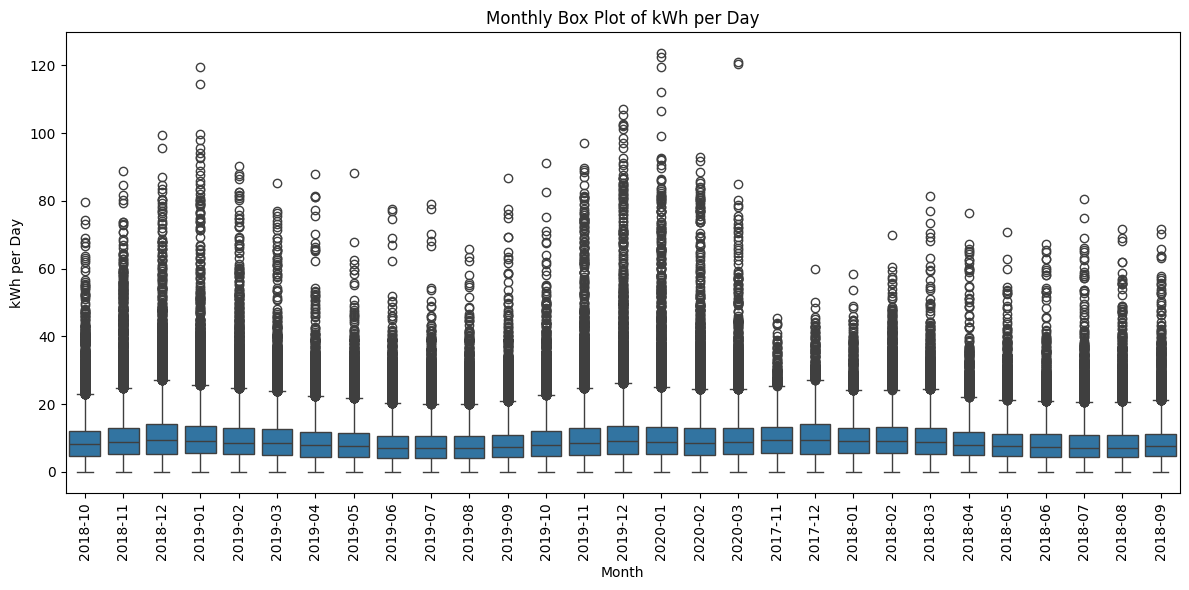

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Generate a time series box plot aggregated by month
Y_df_train['month'] = Y_df_train['ds'].dt.to_period('M')
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='y', data=Y_df_train)
plt.xticks(rotation=90)
plt.title('Monthly Box Plot of kWh per Day')
plt.xlabel('Month')
plt.ylabel('kWh per Day')
plt.tight_layout()
plt.show()

https://docs.pypots.com/en/latest/examples.html

## Transforming from long data to wide data in order to let the MICE algorithm have more information

In [ ]:
# prompt: Transform Y_df_train into wide format, ds is the time and stays the same, y is replaced by each corresponding unique_id

Y_df_train_wide = Y_df_train.pivot(index='ds', columns='unique_id', values='y').reset_index()
Y_df_train_wide.drop(columns=['ds'], inplace=True)
Y_df_train_wide

unique_id,0020be9442d37d94e56550356ea4da6dbaf9d480932ca29279b6461e2f76ddbc,00effd348b9c800790820fce60d86d4d56534be2ca3371f75da7e1d741c8caac,00fadfcce77cc654788f8e1e368aaffde4730b709a16caf38d04134516dba3f2,0155a3c310ed14ab4f201e13d036a8ebfcebaa79a37fff37f66d54e15e2fe2b0,01a3c9ebaf5e6f7f63e2ac7fa17445b3d4ebd1ac94c621b785e6090eab1f7912,025ef6dfd93d6809a234dddf016ddc5e05f60af002b3e4d9c150bdb4e7e0f574,02efd921c555cd758442b25e27b1032d53f2120f6430bbc173c172772e8052ec,032098ff772bdd6dec4e12f1e5958b165b20f88175c4dcb32553a1eae9436f9c,034e30ff72024f4361584f3d3f9ec61f53477046c0bd58ddebf4650acf9b9f46,03583ac75879562c1d472f002409d32011204369c80a31cb38721379f5b7616e,...,fdf1a53e3f9c0fb440993c2fdd4c46ad97460ea8ea0f57b2277d1091a46b381a,fe0b4c2c46e8e35cad468ce5166e70b786506470cc68da53e1bbe625f30ec645,fe151549a8932253fa39719a88d7c5abae36b10658716988c71cf32ea0685e43,fe270be5a5a126f64b3ffb30330e027317c65c7bee72192be6f8e2711d788afb,fe631684ef8372505b2022b338d8c7e13a1f67654a1c60895ddb999d61d8dade,feaecdef77bc6540bd87029abad65fdfe20f0817ed79c77e6d51898663951709,ff0687dea03d0bf03add14cdd97177d5f9337651b85371b220c49bca70272bf3,ff31e445073308103f51fd2a13ac27744857dec5b2ef7fd4af4158cbeb4dee69,ff6f4cb69bf6cc27d89a45677670045b135b3977d323ad88b249a376c9ed8084,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0871521795f3969a6a4
0,NaN,10.775578,NaN,NaN,NaN,5.652746,NaN,NaN,NaN,NaN,...,NaN,3.407507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,12.054909,NaN,NaN,NaN,4.932060,NaN,NaN,NaN,NaN,...,NaN,2.934572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,18.235751,NaN,NaN,NaN,6.929447,NaN,NaN,NaN,NaN,...,NaN,2.761918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,17.773659,NaN,NaN,NaN,6.819280,NaN,NaN,NaN,NaN,...,NaN,3.361686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,19.632347,NaN,NaN,NaN,6.993293,NaN,NaN,NaN,NaN,...,NaN,2.412690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,0.570733,17.174671,23.764450,21.111919,2.493126,8.450772,13.648165,11.004832,0.356541,5.386979,...,2.857907,5.179760,7.554789,9.300753,8.005470,14.530748,17.246011,15.038595,6.020420,27.090503
867,0.528544,14.577279,29.264517,20.171647,5.048643,7.682502,12.523729,13.801415,0.588655,4.186917,...,4.744519,6.015795,7.554789,10.049987,5.931506,15.057087,17.470356,31.199429,5.875641,23.539776
868,3.529623,11.592331,22.389467,17.991288,6.019338,6.828790,16.429235,13.947516,0.356730,6.880925,...,5.714349,5.327221,7.554789,9.529812,17.011514,14.540187,18.936776,13.320542,6.994389,34.060928
869,0.384500,11.608657,20.494460,20.078426,5.678495,5.404782,17.884861,12.812347,0.361617,3.932415,...,4.964869,8.039445,7.554789,11.076632,6.953213,18.922573,18.859295,11.680040,5.072268,27.958430


In [ ]:
Y_df_train_long = pd.melt(Y_df_train_wide, var_name='unique_id', value_name='y')


# Display the long format dataframe
Y_df_train_long

,unique_id,y
0,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,NaN
1,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,NaN
2,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,NaN
3,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,NaN
4,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,NaN
...,...,...
737732,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0...,27.090503
737733,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0...,23.539776
737734,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0...,34.060928
737735,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0...,27.958430


In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Impute the log-transformed data
imputer = IterativeImputer(sample_posterior = True, n_nearest_features = 100, skip_complete = True, min_value = 0,  random_state = 42).set_output(transform="pandas")
imputed_data = imputer.fit_transform(Y_df_train_wide)

#imputed_data.to_csv('Data Imputation/MICE_Imputed.csv', index=False)
imputed_data

,0020be9442d37d94e56550356ea4da6dbaf9d480932ca29279b6461e2f76ddbc,00effd348b9c800790820fce60d86d4d56534be2ca3371f75da7e1d741c8caac,00fadfcce77cc654788f8e1e368aaffde4730b709a16caf38d04134516dba3f2,0155a3c310ed14ab4f201e13d036a8ebfcebaa79a37fff37f66d54e15e2fe2b0,01a3c9ebaf5e6f7f63e2ac7fa17445b3d4ebd1ac94c621b785e6090eab1f7912,025ef6dfd93d6809a234dddf016ddc5e05f60af002b3e4d9c150bdb4e7e0f574,02efd921c555cd758442b25e27b1032d53f2120f6430bbc173c172772e8052ec,032098ff772bdd6dec4e12f1e5958b165b20f88175c4dcb32553a1eae9436f9c,034e30ff72024f4361584f3d3f9ec61f53477046c0bd58ddebf4650acf9b9f46,03583ac75879562c1d472f002409d32011204369c80a31cb38721379f5b7616e,...,fdf1a53e3f9c0fb440993c2fdd4c46ad97460ea8ea0f57b2277d1091a46b381a,fe0b4c2c46e8e35cad468ce5166e70b786506470cc68da53e1bbe625f30ec645,fe151549a8932253fa39719a88d7c5abae36b10658716988c71cf32ea0685e43,fe270be5a5a126f64b3ffb30330e027317c65c7bee72192be6f8e2711d788afb,fe631684ef8372505b2022b338d8c7e13a1f67654a1c60895ddb999d61d8dade,feaecdef77bc6540bd87029abad65fdfe20f0817ed79c77e6d51898663951709,ff0687dea03d0bf03add14cdd97177d5f9337651b85371b220c49bca70272bf3,ff31e445073308103f51fd2a13ac27744857dec5b2ef7fd4af4158cbeb4dee69,ff6f4cb69bf6cc27d89a45677670045b135b3977d323ad88b249a376c9ed8084,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0871521795f3969a6a4
0,2.303149,10.775578,23.818095,16.516041,4.370415,5.652746,1.460458,10.641202,3.439081,3.879702,...,4.319241,3.407507,6.882294,5.677143,16.935787,20.173385,15.288016,13.276416,8.456510,18.372456
1,1.135970,12.054909,21.203444,16.099011,4.836539,4.932060,16.266550,11.533305,1.977513,5.558086,...,2.270463,2.934572,6.468019,12.780430,9.215249,16.094434,20.249607,11.583236,7.077865,24.737054
2,2.275403,18.235751,12.442304,9.694830,5.309602,6.929447,12.964774,9.432497,3.710168,5.704939,...,5.769556,2.761918,11.254197,10.472550,6.741334,11.037461,15.420885,16.626370,3.274929,21.076885
3,1.837129,17.773659,3.886437,18.754637,10.331753,6.819280,9.374214,6.682864,5.341456,3.609222,...,7.941461,3.361686,11.653619,9.223784,5.897818,15.272330,25.299806,20.273247,6.714507,41.700379
4,1.603872,19.632347,17.543746,17.618082,2.647592,6.993293,11.763151,9.361569,0.196201,7.074031,...,5.708322,2.412690,5.882533,7.989455,11.267894,15.937967,20.131527,14.361872,4.847595,35.318786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,0.570733,17.174671,23.764450,21.111919,2.493126,8.450772,13.648165,11.004832,0.356541,5.386979,...,2.857907,5.179760,7.554789,9.300753,8.005470,14.530748,17.246011,15.038595,6.020420,27.090503
867,0.528544,14.577279,29.264517,20.171647,5.048643,7.682502,12.523729,13.801415,0.588655,4.186917,...,4.744519,6.015795,7.554789,10.049987,5.931506,15.057087,17.470356,31.199429,5.875641,23.539776
868,3.529623,11.592331,22.389467,17.991288,6.019338,6.828790,16.429235,13.947516,0.356730,6.880925,...,5.714349,5.327221,7.554789,9.529812,17.011514,14.540187,18.936776,13.320542,6.994389,34.060928
869,0.384500,11.608657,20.494460,20.078426,5.678495,5.404782,17.884861,12.812347,0.361617,3.932415,...,4.964869,8.039445,7.554789,11.076632,6.953213,18.922573,18.859295,11.680040,5.072268,27.958430


In [ ]:
Y_df_Imp_long = pd.melt(imputed_data, var_name='unique_id', value_name='y')

Y_df_Imp_long

,unique_id,y
0,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2.303149
1,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,1.135970
2,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2.275403
3,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,1.837129
4,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,1.603872
...,...,...
737732,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0...,27.090503
737733,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0...,23.539776
737734,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0...,34.060928
737735,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0...,27.958430


# Missing data insertion

### importing Y_df_train in order to change it with the imputed values found

In [ ]:
from utilsforecast.preprocessing import fill_gaps

Y_df_train = pd.read_csv('Processed data/Y_df_train.csv')

Y_df_train['ds'] = pd.to_datetime(Y_df_train['ds'])

Y_df_train = Y_df_train.sort_values(by=['unique_id', 'ds'])
Y_df_train = Y_df_train.dropna()


Y_df_train = fill_gaps(
    Y_df_train,
    freq='D',
    start='global',
    end='global'
)
Y_df_train

,unique_id,ds,y
0,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2017-11-02,NaN
1,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2017-11-03,NaN
2,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2017-11-04,NaN
3,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2017-11-05,NaN
4,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2017-11-06,NaN
...,...,...,...
737732,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0...,2020-03-17,27.090503
737733,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0...,2020-03-18,23.539776
737734,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0...,2020-03-19,34.060928
737735,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0...,2020-03-20,27.958430


In [ ]:
Y_imp_df_train = Y_df_train.copy()
Y_imp_df_train['Imputed'] = Y_df_Imp_long['y']
Y_imp_df_train['y'] = Y_imp_df_train['y'].fillna(Y_imp_df_train['Imputed'])

Y_imp_df_train

,unique_id,ds,y,Imputed
0,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2017-11-02,2.303149,2.303149
1,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2017-11-03,1.135970,1.135970
2,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2017-11-04,2.275403,2.275403
3,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2017-11-05,1.837129,1.837129
4,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2017-11-06,1.603872,1.603872
...,...,...,...,...
737732,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0...,2020-03-17,27.090503,27.090503
737733,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0...,2020-03-18,23.539776,23.539776
737734,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0...,2020-03-19,34.060928,34.060928
737735,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0...,2020-03-20,27.958430,27.958430


In [ ]:
Y_imp_df_train.drop(columns=['Imputed'], inplace=True)
Y_imp_df_train

,unique_id,ds,y
0,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2017-11-02,2.303149
1,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2017-11-03,1.135970
2,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2017-11-04,2.275403
3,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2017-11-05,1.837129
4,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2017-11-06,1.603872
...,...,...,...
737732,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0...,2020-03-17,27.090503
737733,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0...,2020-03-18,23.539776
737734,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0...,2020-03-19,34.060928
737735,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0...,2020-03-20,27.958430


In [ ]:
negative_count = (Y_imp_df_train['y'] < 0).sum()
negative_count

0

In [ ]:
Y_imp_df_train.to_csv('Data Imputation/Y_imp_df_train.csv', index=False)

# Time series test, Differencesses, Scaling

## EDA Y_imp_df_train

In [ ]:
Y_imp_df_train = pd.read_csv('Data Imputation/Y_imp_df_train.csv')

Y_imp_df_train['ds'] = pd.to_datetime(Y_imp_df_train['ds'])

Y_imp_df_train = Y_imp_df_train.sort_values(by=['unique_id', 'ds'])

Y_imp_df_train

,unique_id,ds,y
0,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2017-11-02,2.303149
1,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2017-11-03,1.135970
2,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2017-11-04,2.275403
3,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2017-11-05,1.837129
4,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2017-11-06,1.603872
...,...,...,...
737732,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0...,2020-03-17,27.090503
737733,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0...,2020-03-18,23.539776
737734,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0...,2020-03-19,34.060928
737735,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0...,2020-03-20,27.958430


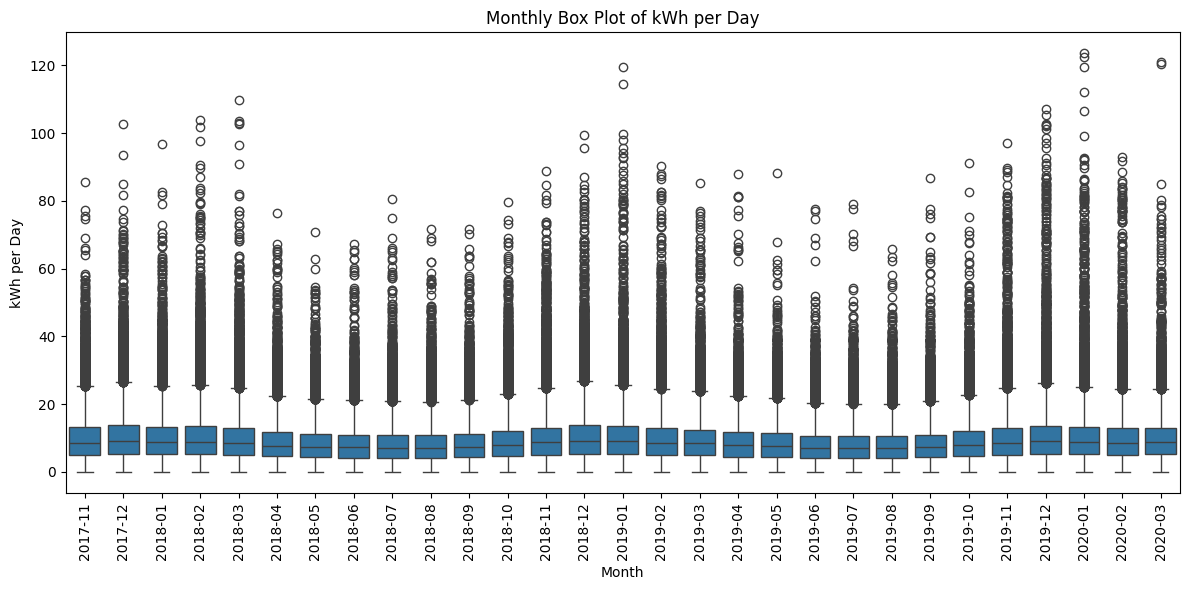

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Y_imp_df_train_month = Y_imp_df_train.copy()
# Generate a time series box plot aggregated by month
Y_imp_df_train_month['month'] = Y_imp_df_train_month['ds'].dt.to_period('M')
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='y', data=Y_imp_df_train_month)
plt.xticks(rotation=90)
plt.title('Monthly Box Plot of kWh per Day')
plt.xlabel('Month')
plt.ylabel('kWh per Day')
plt.tight_layout()
plt.show()

In [ ]:
negative_count = (Y_imp_df_train['y'] < 0).sum()
negative_count

0

/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:27: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


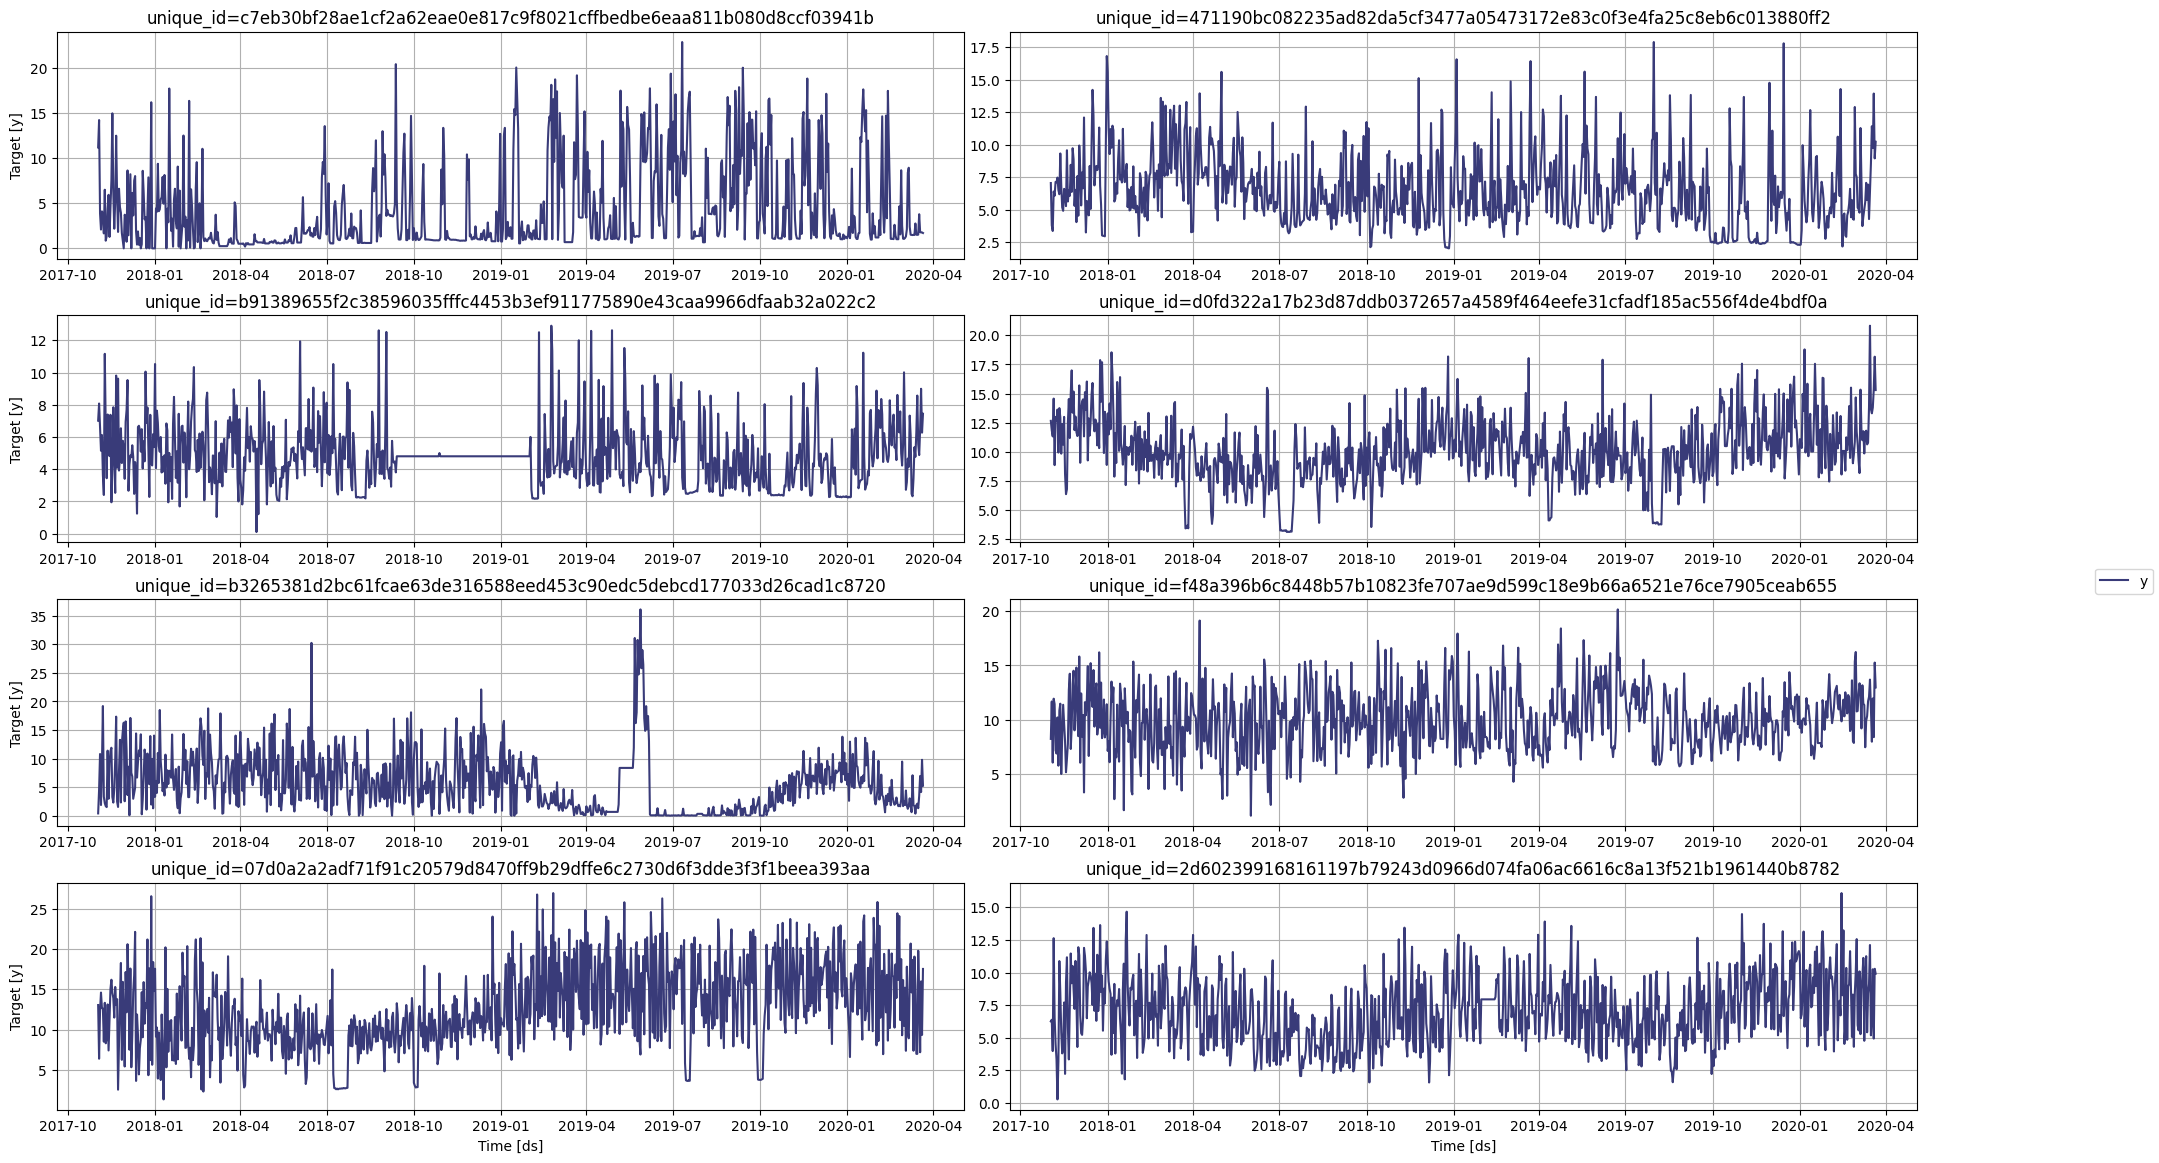

In [ ]:
from statsforecast import StatsForecast
StatsForecast.plot(Y_imp_df_train)

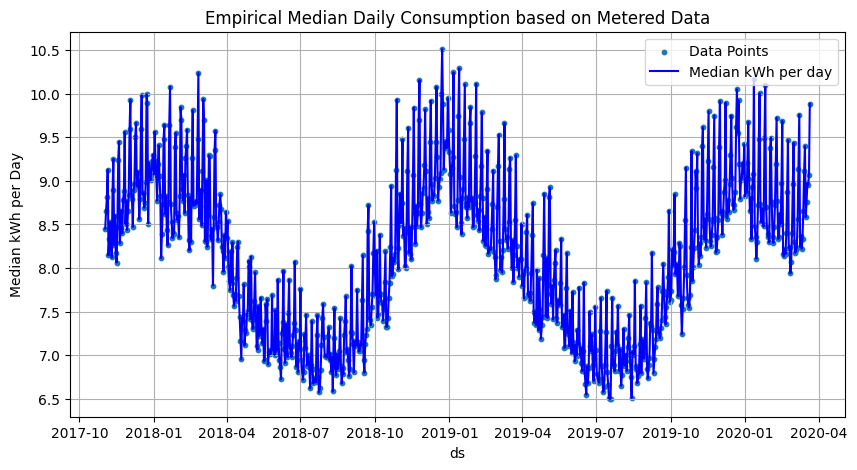

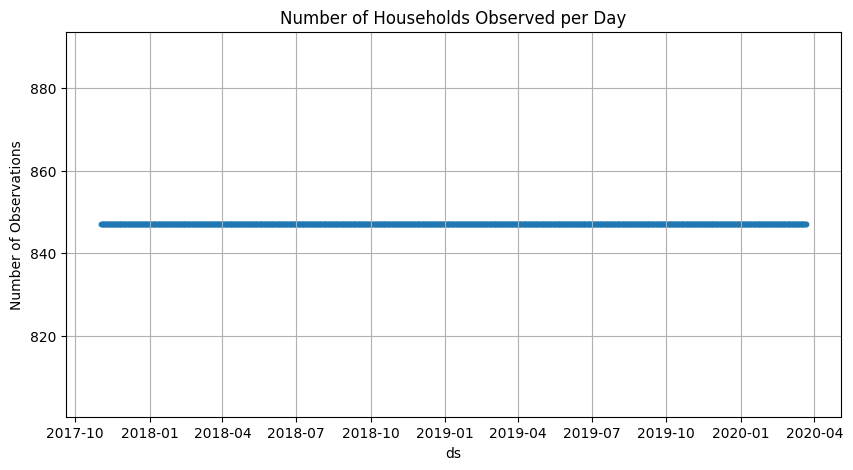

In [ ]:
import matplotlib.pyplot as plt

# Calculate the necessary statistics for each day
stats_per_day_Vanilla = Y_imp_df_train.groupby('ds').agg(
    mean_kwh_perday=('y', 'mean'),
    median_kwh_perday=('y', 'median'),
    sd=('y', 'std'),
    n=('y', lambda x: x.notna().sum()),
    q05=('y', lambda x: np.percentile(x.dropna(), 5)),
    q95=('y', lambda x: np.percentile(x.dropna(), 95))
).reset_index()

# Plotting Median kWh per Day
plt.figure(figsize=(10, 5))
plt.scatter(stats_per_day_Vanilla['ds'], stats_per_day_Vanilla['median_kwh_perday'], s=10, label='Data Points')
plt.plot(stats_per_day_Vanilla['ds'], stats_per_day_Vanilla['median_kwh_perday'], label='Median kWh per day', color='blue')
plt.title('Empirical Median Daily Consumption based on Metered Data')
plt.xlabel('ds')
plt.ylabel('Median kWh per Day')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the number of observations per day
plt.figure(figsize=(10, 5))
plt.scatter(stats_per_day_Vanilla['ds'], stats_per_day_Vanilla['n'], s=10)
plt.title('Number of Households Observed per Day')
plt.xlabel('ds')
plt.ylabel('Number of Observations')
plt.grid(True)
plt.show()

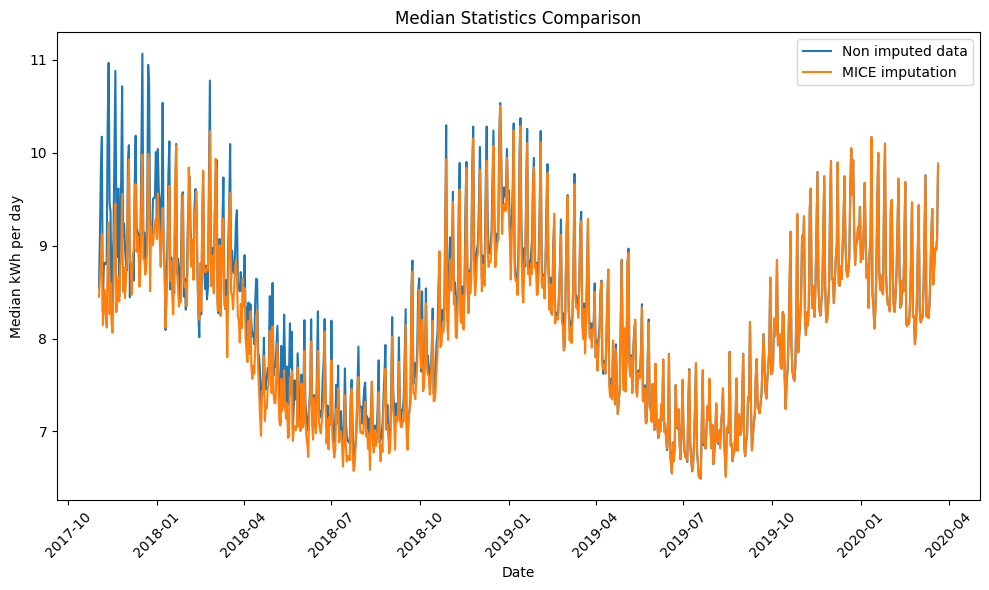

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Original Data
stats_per_day = Y_df_train.groupby('ds').agg(
    mean_kwh_perday=('y', 'mean'),
    median_kwh_perday=('y', 'median'),
    sd=('y', 'std'),
    n=('y', lambda x: x.notna().sum()),

).reset_index()



stats_per_day_Yearly_Daily = Y_imp_df_train.groupby('ds').agg(
    mean_kwh_perday=('y', 'mean'),
    median_kwh_perday=('y', 'median'),
    sd=('y', 'std'),
    n=('y', lambda x: x.notna().sum()),
).reset_index()

# Plotting
plt.figure(figsize=(10, 6))

# Original data
plt.plot(stats_per_day['ds'], stats_per_day['median_kwh_perday'], label='Non imputed data')

# Aggregated datasets
plt.plot(stats_per_day_Yearly_Daily['ds'], stats_per_day_Yearly_Daily['median_kwh_perday'], label='MICE imputation')


plt.xlabel('Date')
plt.ylabel('Median kWh per day')
plt.title('Median Statistics Comparison')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

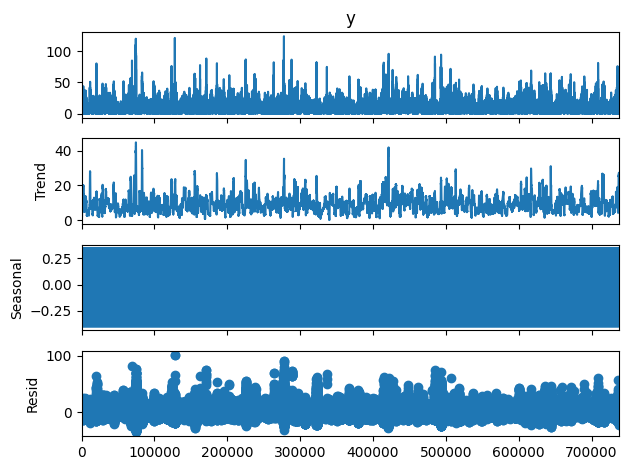

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposing the series to find seasonality

period = 365
decomposition = seasonal_decompose(Y_imp_df_train['y'], model='additive', period=period)  # Adjust period based on your guess

# Plot the decomposed components
fig = decomposition.plot()
plt.show()

In [ ]:
from coreforecast.seasonal import find_season_length
from coreforecast.scalers import LocalStandardScaler, LocalMinMaxScaler, LocalRobustScaler, AutoDifferences
import numpy as np
from coreforecast.grouped_array import GroupedArray

data = Y_imp_df_train['y'].values
unique_groups = Y_imp_df_train['unique_id'].unique()
indptr = np.append(0, Y_imp_df_train.groupby('unique_id')['y'].count().cumsum().values)
ga = GroupedArray(data, indptr)
find_season_length(data, 365)

0

Mean ADF Statistic: -5.282159302027303
Median ADF Statistic: -4.32407346040791
Number of stationary time series: 685
Number of non-stationary time series: 162
Mean Autocorrelation: [1.         0.33899204 0.25633493 0.22289787 0.2065329  0.19988341
 0.22537556 0.26461112 0.20763458 0.16881631 0.1575355  0.1530992
 0.15505051 0.18289941 0.22643179 0.17543466 0.1411952  0.13388241
 0.12938364 0.13333372 0.16219389 0.20330232 0.15534973 0.12514342
 0.11797752 0.11524506 0.12082777 0.14929556 0.19177994 0.14524612
 0.11302017 0.10476743 0.10343133 0.10622548 0.13432413 0.17346236
 0.13006448 0.09989717 0.09200481 0.08912097 0.0941106  0.12171986
 0.16141207 0.11763884 0.08687787 0.07932685 0.07597574 0.08082359
 0.10880744 0.14572421 0.10356681 0.07535599 0.06875657 0.0672321
 0.07166518 0.09861882 0.13505479 0.09198075 0.06630627 0.05815409
 0.05810868 0.06123855 0.0878022  0.12101379 0.0821125  0.05251829
 0.04526153 0.04377605 0.04616448 0.0712822  0.10789073 0.06723044
 0.03950994 0.034

<ipython-input-18-d085b6c6cfca>:70: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(mean_autocorr, use_line_collection=True)
<ipython-input-18-d085b6c6cfca>:77: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(mean_partial_autocorr, use_line_collection=True)


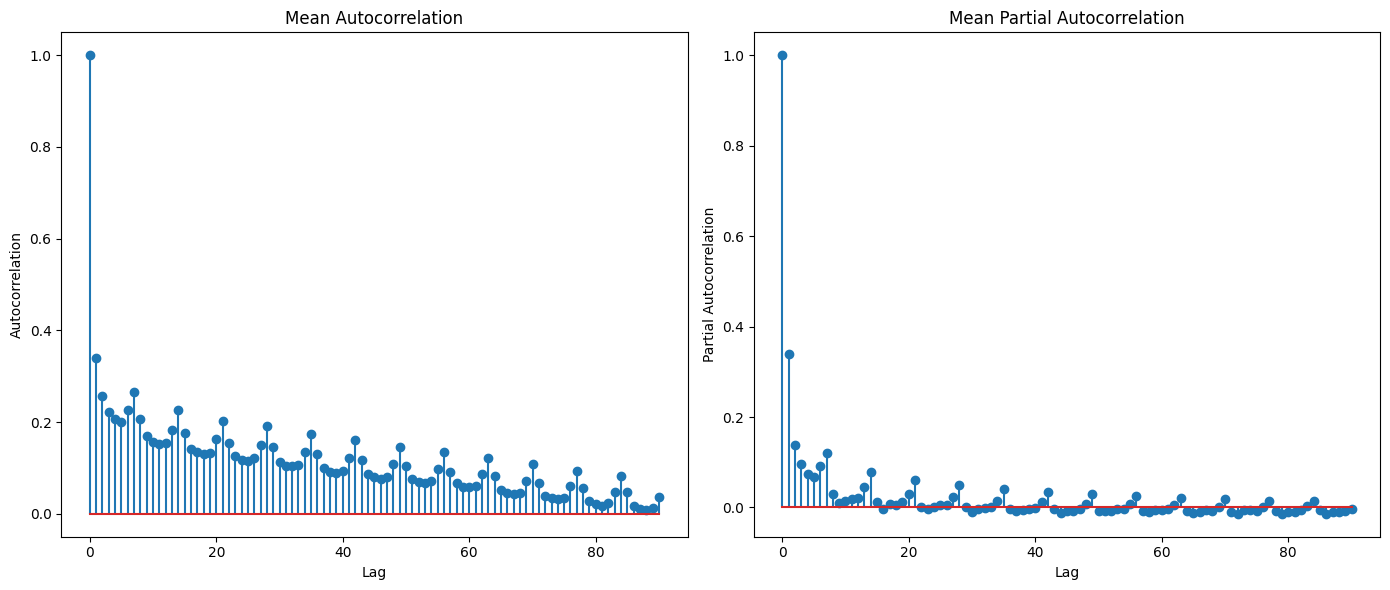

In [ ]:
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Assuming your DataFrame is named df
adf_results = []

# Loop through each unique_id
for unique_id, group_data in Y_imp_df_train.groupby('unique_id'):
    # Apply ADF test to the 'y' column of the group_data
    result = adfuller(group_data['y'])
    adf_results.append((unique_id, result[0], result[1]))

# Convert results to DataFrame
adf_results_df = pd.DataFrame(adf_results, columns=['unique_id', 'ADF Statistic', 'p-value'])

# Calculate mean or median of ADF statistic
adf_statistic_mean = adf_results_df['ADF Statistic'].mean()
adf_statistic_median = adf_results_df['ADF Statistic'].median()

# Set threshold
threshold = 0.05  # You can adjust this threshold based on your significance level

# Determine stationary or non-stationary based on threshold
stationary_ids = adf_results_df[adf_results_df['p-value'] < threshold]['unique_id'].tolist()
non_stationary_ids = adf_results_df[adf_results_df['p-value'] >= threshold]['unique_id'].tolist()

# Summary
print(f"Mean ADF Statistic: {adf_statistic_mean}")
print(f"Median ADF Statistic: {adf_statistic_median}")
print(f"Number of stationary time series: {len(stationary_ids)}")
print(f"Number of non-stationary time series: {len(non_stationary_ids)}")

# Assuming df is your DataFrame with columns unique_id, ds, and y

# Step 1: Group by unique_id
groups = Y_imp_df_train.groupby('unique_id')

# Step 2: Compute autocorrelation and partial autocorrelation for each group
autocorr_results = []
partial_autocorr_results = []

nlags = 90
for name, group in groups:
    autocorr = sm.tsa.acf(group['y'], nlags=nlags)  # Adjust nlags as needed
    partial_autocorr = sm.tsa.pacf(group['y'], nlags=nlags)  # Adjust nlags as needed
    autocorr_results.append(autocorr)
    partial_autocorr_results.append(partial_autocorr)

# Step 3: Aggregate results using mean or median
mean_autocorr = np.mean(autocorr_results, axis=0)
mean_partial_autocorr = np.mean(partial_autocorr_results, axis=0)

# Step 4: Apply thresholding to determine significance
threshold = 0.05  # Define your threshold here
significant_autocorr = np.abs(mean_autocorr) > threshold
significant_partial_autocorr = np.abs(mean_partial_autocorr) > threshold

# Print or use the results as needed
print("Mean Autocorrelation:", mean_autocorr)
print("Mean Partial Autocorrelation:", mean_partial_autocorr)
print("Significant Autocorrelation:", significant_autocorr)
print("Significant Partial Autocorrelation:", significant_partial_autocorr)

# Plotting
plt.figure(figsize=(14, 6))

# Mean Autocorrelation plot
plt.subplot(1, 2, 1)
plt.stem(mean_autocorr, use_line_collection=True)
plt.title('Mean Autocorrelation')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')

# Mean Partial Autocorrelation plot
plt.subplot(1, 2, 2)
plt.stem(mean_partial_autocorr, use_line_collection=True)
plt.title('Mean Partial Autocorrelation')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')

# Show plot
plt.tight_layout()
plt.show()